# eCommerce Sales & Profitability Analysis
## Project Overview
This project performs a comprehensive analysis of a "Superstore" eCommerce dataset. The goal is to uncover sales trends, identify the most profitable products and regions, and understand how business factors like discounts impact the bottom line.
## Key Objectives:
* Analyze **Temporal Trends** to identify peak sales months.
* Evaluate **Geographic Performance** across different regions.
* Conduct **Correlation Analysis** between Sales, Profit, and Discounts.
* Provide data-driven recommendations for business growth.

*The dataset used in this analysis is the Sample Superstore dataset, sourced from Tableau. It is a widely used dataset for educational and analytical demonstration purposes.*

# Executive Summary
After analyzing over 9,000 transactions, the following key insights were discovered:
* **Top Revenue Driver:** The "Technology" category leads in both sales and profit, while the West Region is the strongest geographic market.
* **The "Discount" Trap:** There is a signficantly negative correlation between discounts and profit. Discounts exceeding 20% frequently lead to net losses.
* **Furniture Margins:** Despite high sales volume, the Furniture category has the lowest profit margins, primarily driven by losses in the "Tables" sub category.
* **Seasonality:** Sales peak siginificantly in March and Q4 (October - December), aligning with major holiday shopping periods.

### 1. Data Loading & Library Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
df = pd.read_csv("Superstore_dataset.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2023-103800,1/3/2023,1/7/2023,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2023-112326,1/4/2023,1/8/2023,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2023-112326,1/4/2023,1/8/2023,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2023-112326,1/4/2023,1/8/2023,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2023-141817,1/5/2023,1/12/2023,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


## 2. Data Exploration & Cleaning.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          10194 non-null  int64  
 1   Order ID        10194 non-null  object 
 2   Order Date      10194 non-null  object 
 3   Ship Date       10194 non-null  object 
 4   Ship Mode       10194 non-null  object 
 5   Customer ID     10194 non-null  object 
 6   Customer Name   10194 non-null  object 
 7   Segment         10194 non-null  object 
 8   Country/Region  10194 non-null  object 
 9   City            10194 non-null  object 
 10  State/Province  10194 non-null  object 
 11  Postal Code     10194 non-null  object 
 12  Region          10194 non-null  object 
 13  Product ID      10194 non-null  object 
 14  Category        10194 non-null  object 
 15  Sub-Category    10194 non-null  object 
 16  Product Name    10194 non-null  object 
 17  Sales           10194 non-null 

In [4]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,5097.500000,228.225854,3.791838,0.155385,28.673417
std,2942.898656,619.906839,2.228317,0.206249,232.465115
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2549.250000,17.220000,2.000000,0.000000,1.760800
50%,5097.500000,53.910000,3.000000,0.200000,8.690000
75%,7645.750000,209.500000,5.000000,0.200000,29.297925
max,10194.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
df['Month'] = df['Order Date'].dt.to_period('M')

## 3. The Analysis

**Monthly Sales(Trend)**

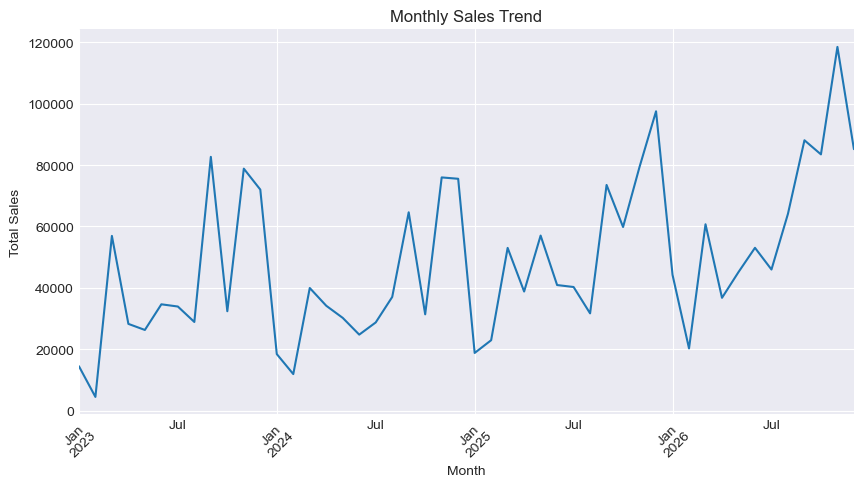

In [8]:
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation = 45 )
plt.show()

**Findings:** Sales are highly seasonal, characterized by a massive volume spike in March and a steady climb during Q4 (October-December)

This suggests that the store's revenue is driven by specific promotional cycles and holiday shopping. Marketing budgets should be prioritized for these high-conversion months.

**Category Profit(Product Analysis)**

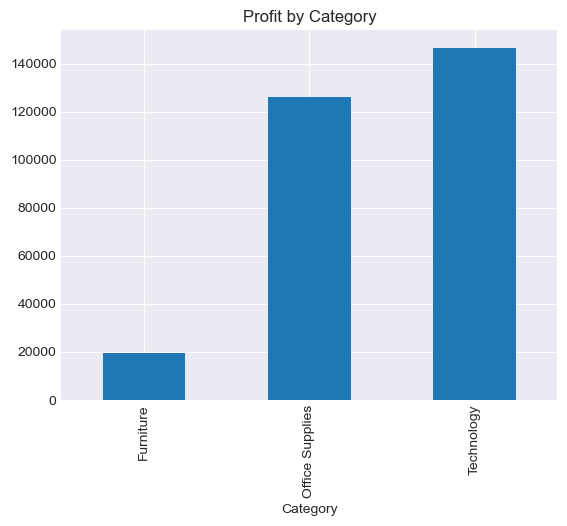

In [9]:
category_profit = df.groupby('Category')['Profit'].sum()
category_profit.plot(kind = 'bar')
plt.title("Profit by Category")
plt.show()

**Findings:** While sales are distributed across all three categories, the "Technology" category is the primary driver of profit for the business. Conversely, "Furniture" shows the lowest profit margins.

The low profitability in Furniture suggests high overhead costs (shipping/storage) or excessive discounting. 

**Regional Sales (Geography - The Pie Chart)**

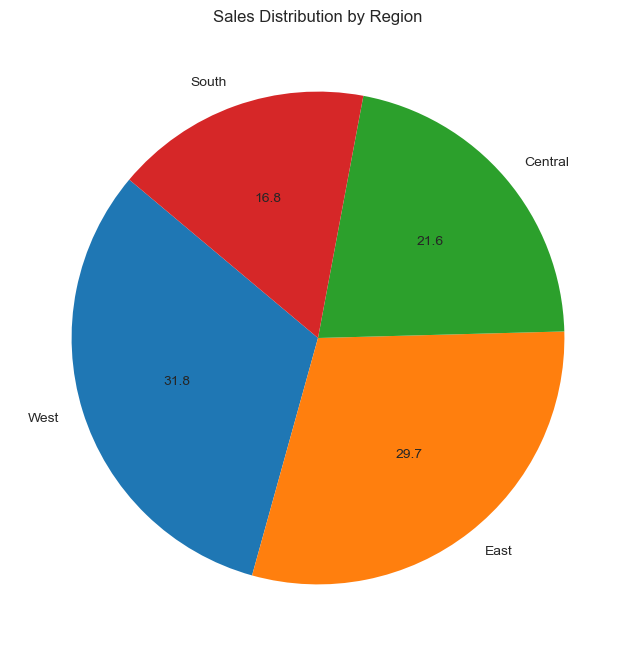

In [10]:
regional_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending = False)
plt.figure(figsize = (8,8))
regional_sales.plot(kind = 'pie', autopct = '%1.1f', startangle = 140)
plt.title("Sales Distribution by Region")
plt.ylabel("")
plt.show()

**Finding:** The West region is the leading market,contributing 31.8% of total sales, followed by East.

Our strongest customer base is located in the West. We should consider expanding distribution centers in this area to reduce shipping times and costs further improving customer satisfaction.

**Sub-Category Profitability analysis**

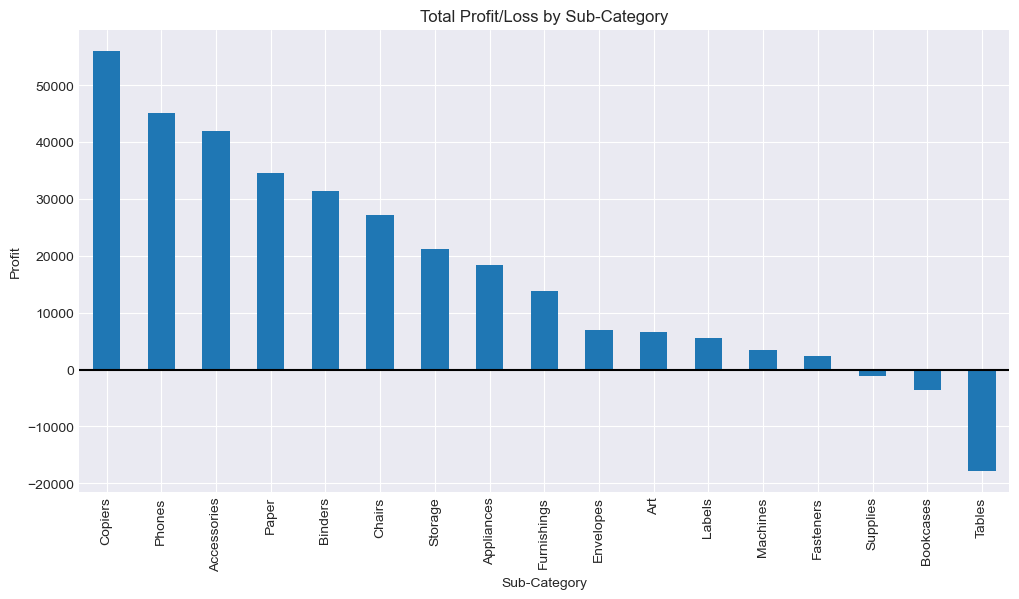

In [11]:

sub_cat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False)
plt.figure(figsize=(12,6))
sub_cat_profit.plot(kind = 'bar')
plt.axhline(0, color = 'black', linewidth = 1.5)
plt.title("Total Profit/Loss by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.show()


**Findings:** While most sub categories are profitable, Tables, Supplies and Bookcases show significant net losses.

This is a critical "Profit Leak." We need to investigate if the losses in Tables are due to high shipping costs for heavy items or if we are discounting them too heavily to clear stock.

**Top 10 products by Sales**

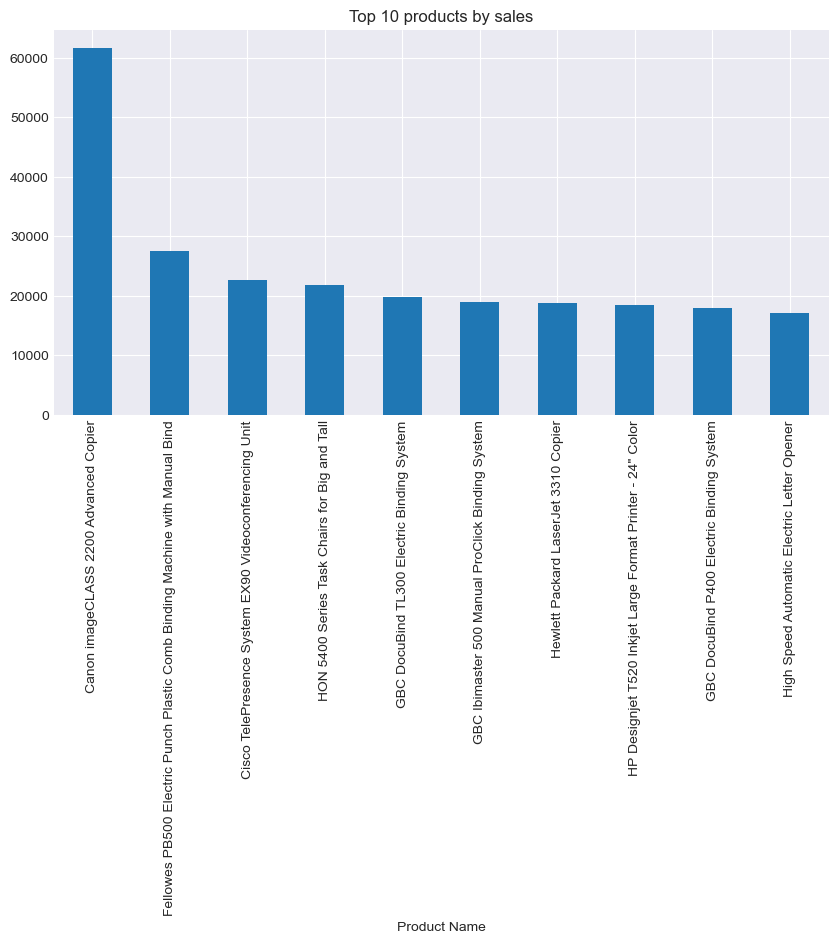

In [12]:

top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize = (10,5))
top_products.plot(kind = 'bar')
plt.title("Top 10 products by sales")
plt.show()

**Findings:** A small number of high value items, primarily in the Technology category drive disproportionate amount of total revenue.

The business is highly dependent on these products. Should ensure high inventory levels for these items to avoid stockouts that could significantly impact monthly totals.

**Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Matrix')

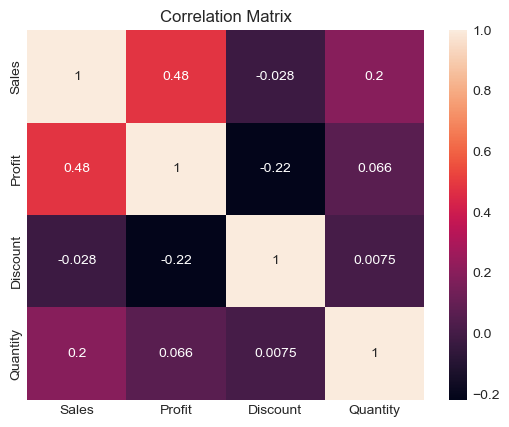

In [13]:

sns.heatmap(df[['Sales','Profit','Discount','Quantity']].corr(),annot = True)
plt.title("Correlation Matrix")


**Findings:** There is a notable negative correlation between Discounts and Profit.

This confirms that our current discounting strategy is eroding our margins. 

## Strategic Business Recommendations
Based on data analysis, the following actions are recommended to improve the store's profitability and operational efficiency:
* **Implement a Discount Cap:** Our correlation analysis proves that discounts over 20% are significantly eroding profits. There should be a policy for approval of discounts exceeding 15-20%.
* **Audit the 'Tables' Sub-Category:** Since Tables are our largest source of loss, we should investigate if this is due to high shipping costs or low price points. Consider removing underperforming models or renegotiating shipping rates for bulky items.
* **Maximize Q4 Marketing ROI:** Sales peak dramatically in March and the Holiday Season(Q4). We should shift our primary advertising budget to these windows to maximize return on investment.
* Since the Technology and Office Supplies are the highest profit drivers, we should create a loyalty program specifically targeting tech enthusiasts in the West Region.
  